**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab18-TH](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab18/Lab18-TH.ipynb)

___

# <font color=darkgreen>Exercise Set 18: Correlation </font>

**Medrano, Giovanni**

**R11521018**

ENGR 1330 Exercise Set 18 - Homework

## Exercise 0. *Profile your computer*

Execute the code cell below to profile your computer.

In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-6HAS1BN
desktop-6has1bn\medra
C:\Users\medra\anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


## Exercise 1. All about concrete

Recall in an earlier lab that you accessed a file of concrete strength and related mixture variables.

In [2]:
#Get database -- use the Get Data From URL Script
#Step 1: import needed modules to interact with the internet
import requests
#Step 2: make the connection to the remote file (actually its implementing "bash curl -O http://fqdn/path ...")
remote_url = 'http://54.243.252.9/engr-1330-webroot/8-Labs/Lab10/concreteData.xls' # an Excel file
response = requests.get(remote_url) # Gets the file contents puts into an object
output = open('concreteData.xls', 'wb') # Prepare a destination, local
output.write(response.content) # write contents of object to named local file
output.close() # close the connection

Then you changed some column names

In [3]:
import pandas

concreteData = pandas.read_excel('concreteData.xls') # read the file
# rename the columns
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(concreteData.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

concreteData = concreteData.rename(columns=mapper)

concreteData.head() # show the dataframe

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Then you did the mulitple plots

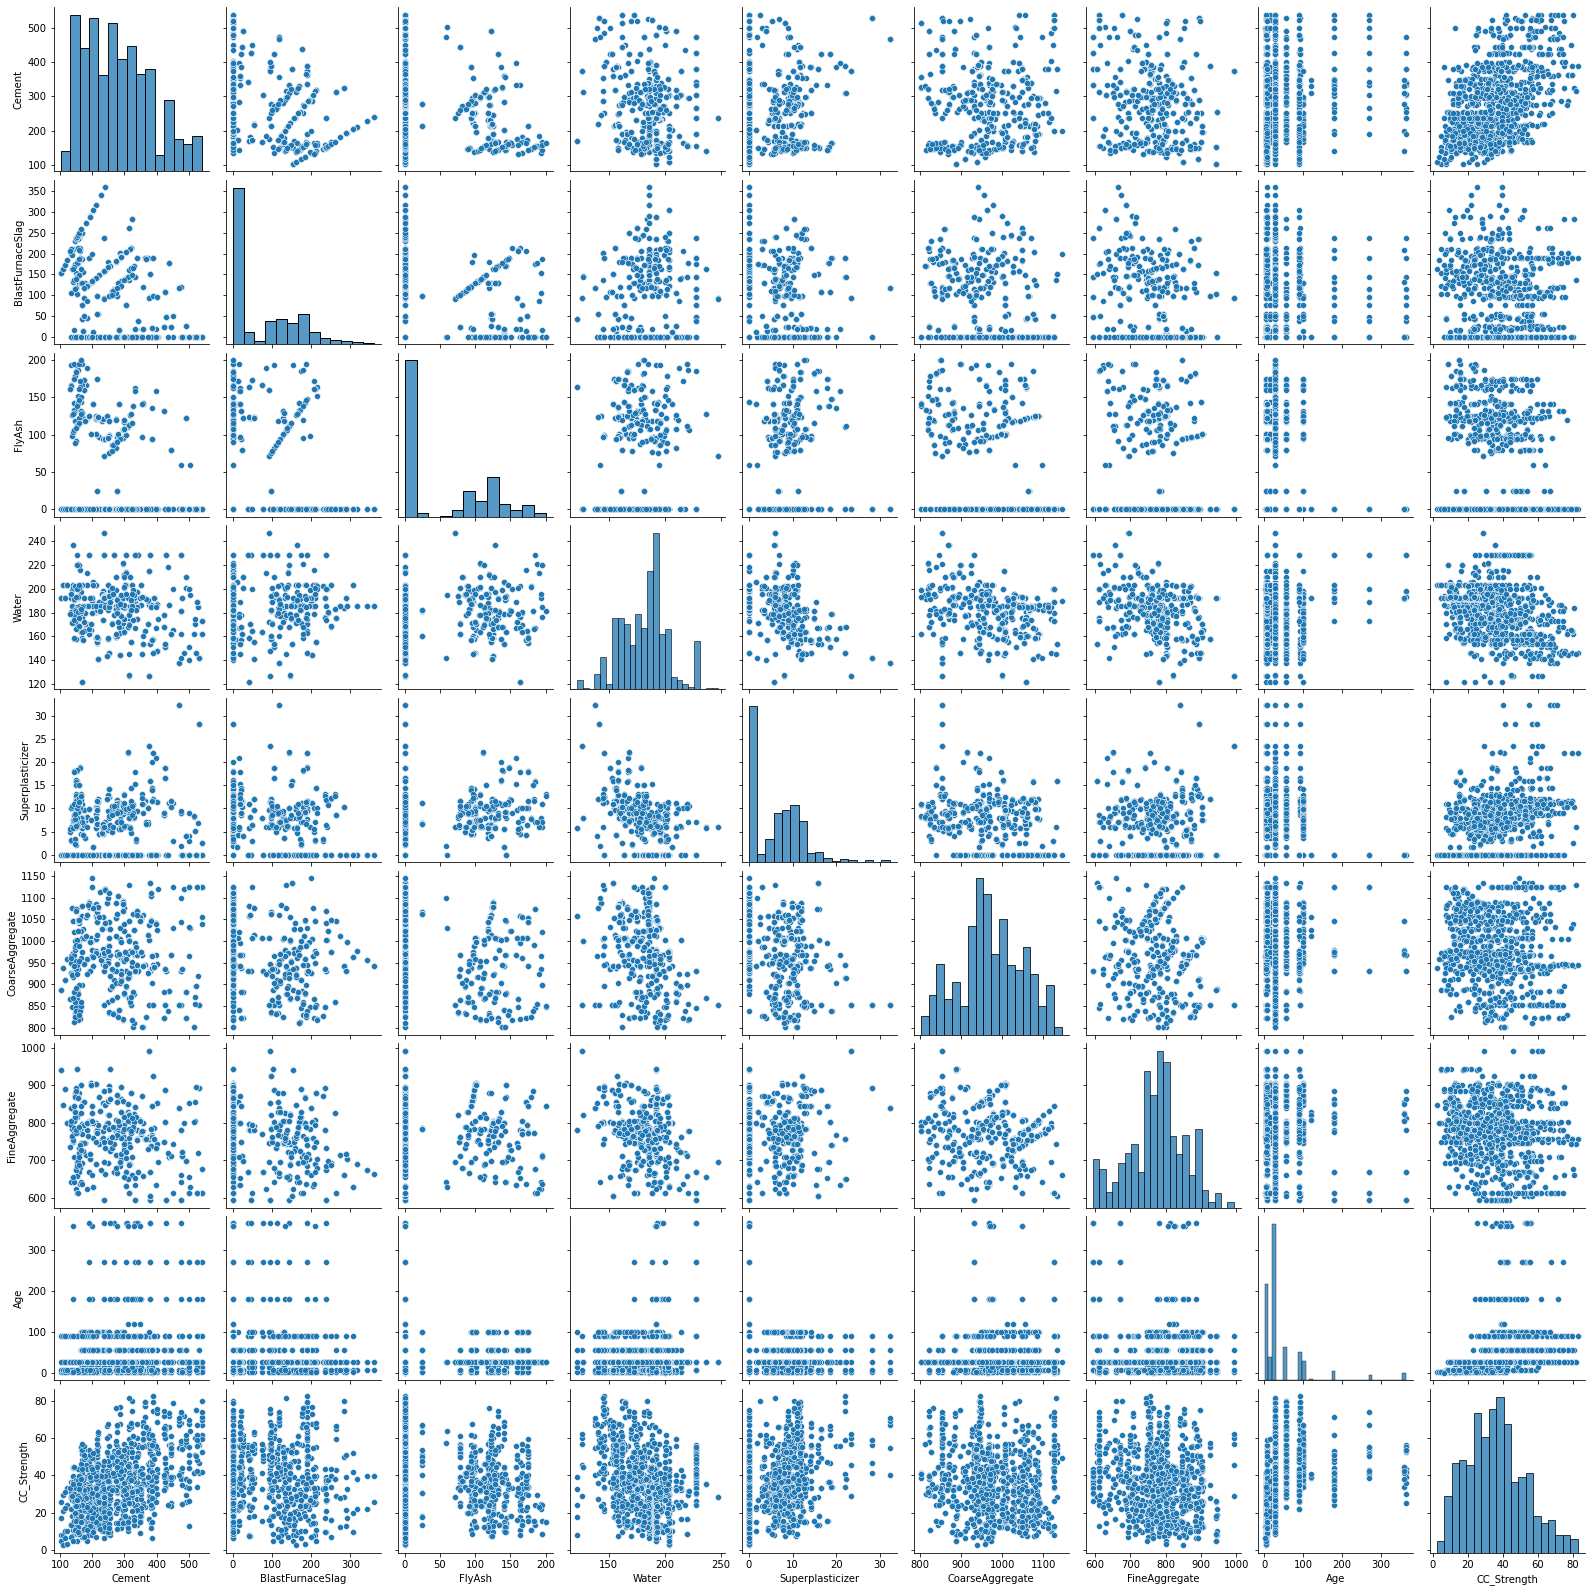

In [4]:
# ! sudo /opt/jupyterhub/bin/python3 -m pip install seaborn
import matplotlib.pyplot  
import seaborn 
%matplotlib inline
seaborn.pairplot(concreteData)
matplotlib.pyplot.show()

So it's a cool plot, but the meaningful data science question is which variable(s) have predictive value for estimating concrete strength?

Answer by:

1. Determine the correlation coefficient for the variable pairs.
2. Rank the predictive value of the variables from highest magnitude to lowest magnitude.
3. Build a linear data model based on the `Cement` variable, what is its correlation coefficient?
$Strength_{model} = \beta_0 + \beta_1 \cdot Cement $
4. Build a scatterplot of of the data model and the observations, and use the plot to find values of the two parameters. 
5. Your assessment of data model utility for this database?

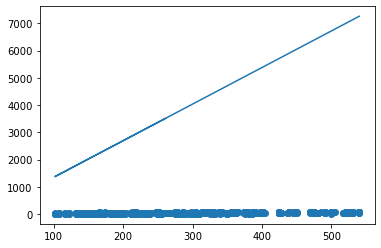

In [7]:
# correlation coefficients
import matplotlib.pyplot as plt
import numpy as np

c = np.polynomial.polynomial.polyfit(concreteData['Cement'],concreteData['CC_Strength'],1)
corr = concreteData.corr()

plt.scatter(concreteData['Cement'],concreteData['CC_Strength'])
plt.plot(concreteData['Cement'],c[0]*concreteData['Cement']+c[1])

plt.show()

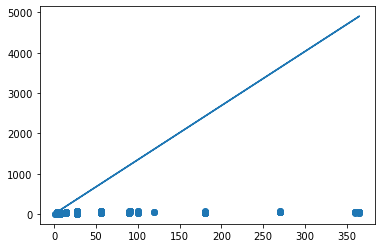

In [8]:
# plotting functions (ok to use built-in in pandas)
import matplotlib.pyplot as plt
plt.scatter(concreteData['Age'],concreteData['CC_Strength'])

plt.plot(concreteData['Age'],c[0]*concreteData['Age']+c[1])


plt.show()


Repeat the exercise using `Age` then `Water`  as the predictor variable.

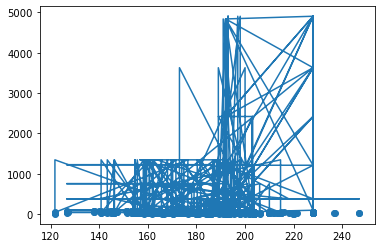

In [12]:
# data model trial-and-error fit
import matplotlib.pyplot as plt
plt.scatter(concreteData['Water'],concreteData['CC_Strength'])
plt.plot(concreteData['Water'],c[0]*concreteData['Age']+c[1])
plt.show()



Which is the better model of the three you examined? 

In [ ]:
I think the Age model is superior.